# URBN PL 213
### Kongpob Leemingsawat
### 5/3/2023

In [40]:
# Library

import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd 
import pandas as pd 
import numpy as np 
import cenpy
from cenpy import products
import matplotlib.pyplot as plt
import json
import requests
from IPython.display import display

# ********************************* IDEA & TEST *********************************

## Example: (API + URL + Pull Request)

- Document (EV Station Info) : [document](https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/all/#request-parameters)
- ZIP (Name)    : [website](https://www.laalmanac.com/communications/cm02a90001-90899.php)
- ZIP (Number)     : [website](https://geohub.lacity.org/datasets/71b2fed2c1f24fc8850f5b7f8d2a320a/explore?location=34.263057%2C-118.148139%2C9.52)
- EV count (number) : [website](https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data)

In [2]:
APIkey = "vgWG8OuzEuSucgBMCVkvH2oBDGkOD62MVH7s97qJ"

In [10]:
# Getting 100 ava EV station - location = random

url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.json?"
params = {
    "limit" : "100",
    "api_key" : APIkey,
    "status" : "E",
    "access" : "all", 
    "fuel_type" : "ELEC", 
} # There are more params that we could add, however, all params are set as default if not specify in params 
r = requests.get(url, params = params)
print(r.text)

{"station_locator_url":"https://afdc.energy.gov/stations/","total_results":56049,"station_counts":{"total":149764,"fuels":{"BD":{"total":0},"E85":{"total":0},"ELEC":{"total":149764,"stations":{"total":56049}},"HY":{"total":0},"LNG":{"total":0},"CNG":{"total":0},"LPG":{"total":0},"RD":{"total":0}}},"fuel_stations":[{"access_code":"private","access_days_time":"Fleet use only","access_detail_code":null,"cards_accepted":null,"date_last_confirmed":"2023-01-10","expected_date":null,"fuel_type_code":"ELEC","groups_with_access_code":"Private","id":1517,"open_date":"1999-10-15","owner_type_code":"LG","status_code":"E","restricted_access":null,"station_name":"LADWP - Truesdale Center","station_phone":null,"updated_at":"2023-02-15T22:45:41Z","facility_type":"UTILITY","geocode_status":"GPS","latitude":34.2483191527193,"longitude":-118.3879713743439,"city":"Sun Valley","intersection_directions":null,"plus4":null,"state":"CA","street_address":"11797 Truesdale St","zip":"91352","country":"US","bd_ble

In [12]:
d = json.loads(r.text)
df = pd.DataFrame(d["fuel_stations"]) # All information that we need are in fuel_stations dictionary
df.head()

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,...,rd_blends_fr,rd_blended_with_biodiesel,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids
0,private,Fleet use only,None,None,2023-01-10,None,ELEC,Private,1517,1999-10-15,...,None,None,None,None,None,None,None,Privé,None,NaN
1,private,None,None,None,2023-01-10,None,ELEC,Private,1519,2020-02-28,...,None,None,None,None,None,None,None,Privé,None,NaN
2,public,5:30am-9pm; pay lot,None,None,2023-01-10,None,ELEC,Public,1523,1995-08-30,...,None,None,None,None,None,None,None,Public,None,NaN
3,private,For fleet and employee use only,None,None,2023-01-10,None,ELEC,Private,1525,1999-10-15,...,None,None,None,None,None,None,None,Privé,None,NaN
4,private,Fleet use only,None,None,2023-01-10,None,ELEC,Private,1531,2018-05-01,...,None,None,None,None,None,None,None,Privé,None,NaN


In [16]:
df.columns

Index(['access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id', 'open_date',
       'owner_type_code', 'status_code', 'restricted_access', 'station_name',
       'station_phone', 'updated_at', 'facility_type', 'geocode_status',
       'latitude', 'longitude', 'city', 'intersection_directions', 'plus4',
       'state', 'street_address', 'zip', 'country', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'cng_has_rng', 'e85_blender_pump',
       'e85_other_ethanol_blends', 'ev_connector_types', 'ev_dc_fast_num',
       'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_network',
       'ev_network_web', 'ev_other_evse', 'ev_pricing', 'ev_renewable_source',
       'hy_is_retail', 'hy_pressures', 'hy_standards', 'hy_status_link',
       'lng_ren

In [111]:
# Getting 1 planned EV station - location = random

url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.json?"
params = {
    "limit" : "1",
    "api_key" : APIkey,
    "status" : "P",
    "access" : "all", 
    "fuel_type" : "ELEC", 
} # There are more params that we could add, however, all params are set as default if not specify in params 
r = requests.get(url, params = params)
print(r.text)

{"station_locator_url":"https://afdc.energy.gov/stations/","total_results":77,"station_counts":{"total":357,"fuels":{"BD":{"total":0},"E85":{"total":0},"ELEC":{"total":357,"stations":{"total":77}},"HY":{"total":0},"LNG":{"total":0},"CNG":{"total":0},"LPG":{"total":0},"RD":{"total":0}}},"fuel_stations":[{"access_code":"public","access_days_time":"Dealership business hours","access_detail_code":"CALL","cards_accepted":null,"date_last_confirmed":"2021-11-04","expected_date":"2023-07-01","fuel_type_code":"ELEC","groups_with_access_code":"PLANNED - not yet accessible (Public - Call ahead)","id":63615,"open_date":null,"owner_type_code":"P","status_code":"P","restricted_access":false,"station_name":"Inver Grove Ford Lincoln","station_phone":"651-451-2201","updated_at":"2023-04-20T14:17:36Z","facility_type":"CAR_DEALER","geocode_status":"200-8","latitude":44.880515,"longitude":-93.080637,"city":"Inver Grove Heights","intersection_directions":null,"plus4":null,"state":"MN","street_address":"472

In [112]:
t = json.loads(r.text)
temp = pd.DataFrame(t["fuel_stations"])
temp.head()

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,...,rd_blends,rd_blends_fr,rd_blended_with_biodiesel,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr
0,public,Dealership business hours,CALL,None,2021-11-04,2023-07-01,ELEC,PLANNED - not yet accessible (Public - Call ah...,63615,None,...,None,None,None,None,None,None,None,None,PRÉVU - pas encore accessible (Public - Appele...,None


## LA Observation: 

In [65]:
# Available

url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.json?"
params = {
    "limit" : "1",
    "api_key" : APIkey,
    "status" : "E",
    "access" : "all", 
    "fuel_type" : "ELEC", 
    "state" : "CA"
} # There are more params that we could add, however, all params are set as default if not specify in params 
r = requests.get(url, params = params)
print(r.text)

{"station_locator_url":"https://afdc.energy.gov/stations/","total_results":14927,"station_counts":{"total":43957,"fuels":{"BD":{"total":0},"E85":{"total":0},"ELEC":{"total":43957,"stations":{"total":14927}},"HY":{"total":0},"LNG":{"total":0},"CNG":{"total":0},"LPG":{"total":0},"RD":{"total":0}}},"fuel_stations":[{"access_code":"private","access_days_time":"Fleet use only","access_detail_code":null,"cards_accepted":null,"date_last_confirmed":"2023-01-10","expected_date":null,"fuel_type_code":"ELEC","groups_with_access_code":"Private","id":1517,"open_date":"1999-10-15","owner_type_code":"LG","status_code":"E","restricted_access":null,"station_name":"LADWP - Truesdale Center","station_phone":null,"updated_at":"2023-02-15T22:45:41Z","facility_type":"UTILITY","geocode_status":"GPS","latitude":34.2483191527193,"longitude":-118.3879713743439,"city":"Sun Valley","intersection_directions":null,"plus4":null,"state":"CA","street_address":"11797 Truesdale St","zip":"91352","country":"US","bd_blend

In [66]:
# Planned 
url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.json?"
params = {
    "limit" : "100",
    "api_key" : APIkey,
    "status" : "P",
    "access" : "all", 
    "fuel_type" : "ELEC", 
} # There are more params that we could add, however, all params are set as default if not specify in params 
r = requests.get(url, params = params)
print(r.text)

{"station_locator_url":"https://afdc.energy.gov/stations/","total_results":77,"station_counts":{"total":357,"fuels":{"BD":{"total":0},"E85":{"total":0},"ELEC":{"total":357,"stations":{"total":77}},"HY":{"total":0},"LNG":{"total":0},"CNG":{"total":0},"LPG":{"total":0},"RD":{"total":0}}},"fuel_stations":[{"access_code":"public","access_days_time":"Dealership business hours","access_detail_code":"CALL","cards_accepted":null,"date_last_confirmed":"2021-11-04","expected_date":"2023-07-01","fuel_type_code":"ELEC","groups_with_access_code":"PLANNED - not yet accessible (Public - Call ahead)","id":63615,"open_date":null,"owner_type_code":"P","status_code":"P","restricted_access":false,"station_name":"Inver Grove Ford Lincoln","station_phone":"651-451-2201","updated_at":"2023-04-20T14:17:36Z","facility_type":"CAR_DEALER","geocode_status":"200-8","latitude":44.880515,"longitude":-93.080637,"city":"Inver Grove Heights","intersection_directions":null,"plus4":null,"state":"MN","street_address":"472

# Function

In [98]:
def get_EVS(zip):
    url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.json?"
    APIkey = "vgWG8OuzEuSucgBMCVkvH2oBDGkOD62MVH7s97qJ"
    params ={
        "api_key" : APIkey,
        "status" : "all", # E = Available / P = Planned / T = Temporarily Unavailable / all = All 
        "access" : "all", # public = Public / private = Private
        "fuel_type" : "ELEC", # ELEC = Electric
        "cards_accepted" : "all", 
        "owner_type" : "all",
        "federal_agency" : "all",
        "federal_agency_id" : "all",
        "cng_fill_type" : "all",
        "cng_vehicle_class" : "all",
        "ev_network" : "all",
        "ev_charging_level" : "all",
        "ev_connector_type" : "all",
        "state" : "CA", 
        "zip" : zip, # LA zipcode 90001 to 90899 and 91001 to 93599
        "country" : "US",
        "limit" : "200", # Maximum = 200 stations/hour
    }
    
    # Request 
    r = requests.get(url, params = params)
    json_read = json.loads(r.text)
    data = pd.DataFrame(json_read["fuel_stations"]) 
    data.head()
    
    # Return
    return data

### So far: 
1. Data 
- can request up to 200 stations / hour 
- There are 14,927 available stations in California and 77 unavailable stations in California 
- To cover Los Angeles area: pull by zip code = 90001 - 90899 
- There are 70 columns. Thus, need to monitor which column to use 
2. Analysis 
- Map the location 
- Combine with Census data 
- Count the number of station 
- Projection : Low-income area vs number of available stations 
3. Machine Learning 
- TBD 

# ******************************* HARVESTING DATA *******************************

# PULL DATA

## 1. EV Charging Stations

In [127]:
# LA zip code
zipcode = pd.read_csv("/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/zipcode/Zip_Codes_(LA_County).csv")

ziplist = zipcode["ZIPCODE"].astype(str).tolist()

# ziplist = zipcode["ZIPCODE"].tolist() -- in case the above does not work 

print(len(ziplist))
print("-------------------------------------------------------------------")
print(ziplist)

311
-------------------------------------------------------------------
['90001', '90002', '90003', '90004', '90005', '90006', '90007', '90008', '90010', '90011', '90012', '90013', '90014', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90043', '90044', '90045', '90046', '90047', '90048', '90049', '90056', '90057', '90058', '90059', '90061', '90062', '90063', '90064', '90065', '90066', '90067', '90068', '90069', '90071', '90073', '90077', '90089', '90094', '90095', '90201', '90210', '90211', '90212', '90220', '90221', '90222', '90230', '90232', '90240', '90241', '90242', '90245', '90247', '90248', '90249', '90250', '90254', '90255', '90260', '90261', '90262', '90263', '90265', '90266', '90270', '90272', '90274', '90275', '90277', '90278', '90280', '90290', '90291', '90292', '90293', '90301', 

In [ ]:
# Because of the limitation in pulling data - make all the zip code into small list (10 each)

num_groups = 31
group_size = 10
ziplists = []

for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    ziplist_group = []
    for j in range(start_index, end_index):
        ziplist_group.append(ziplist[j])
    ziplists.append(ziplist_group) # number 90704 = left over - don't forget to run this

# We do not need this for now, but might in the future

In [140]:
# Pull data 

for i in ziplist:
    EV_data = get_EVS(i)
    print(i)
    EV_data.to_csv(r'/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/request_data/'+str(i)+'.csv', index = True)

90001
90002
90003
90004
90005
90006
90007
90008
90010
90011
90012
90013
90014
90015
90016
90017
90018
90019
90020
90021
90022
90023
90024
90025
90026
90027
90028
90029
90031
90032
90033
90034
90035
90036
90037
90038
90039
90040
90041
90042
90043
90044
90045
90046
90047
90048
90049
90056
90057
90058
90059
90061
90062
90063
90064
90065
90066
90067
90068
90069
90071
90073
90077
90089
90094
90095
90201
90210
90211
90212
90220
90221
90222
90230
90232
90240
90241
90242
90245
90247
90248
90249
90250
90254
90255
90260
90261
90262
90263
90265
90266
90270
90272
90274
90275
90277
90278
90280
90290
90291
90292
90293
90301
90302
90303
90304
90305
90401
90402
90403
90404
90405
90501
90502
90503
90504
90505
90506
90601
90602
90603
90604
90605
90606
90623
90630
90631
90638
90639
90640
90650
90660
90670
90701
90703
90706
90710
90712
90713
90715
90716
90717
90723
90731
90732
90744
90745
90746
90747
90755
90802
90803
90804
90805
90806
90807
90808
90810
90813
90814
90815
90822
90831
90840
90846
91001
9100

In [142]:
import pandas as pd
import os

# Set the path to the data folder
data_folder = '/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/request_data'

# Create an empty list to store the dataframes
dfs = []

# Loop through all the files in the folder
for file in os.listdir(data_folder):
    
    # Check if the file is a CSV file
    if file.endswith('.csv'):
        
        # Read the file into a dataframe
        df = pd.read_csv(os.path.join(data_folder, file))
        
        # Append the dataframe to the list of dataframes
        dfs.append(df)

# Concatenate all the dataframes into a single dataframe
df_all = pd.concat(dfs, ignore_index=True)

# Print the shape of the combined dataframe
print(df_all.shape)

(3960, 72)


In [145]:
ev_df = df_all.copy()
ev_df.head()

,Unnamed: 0,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,rd_blended_with_biodiesel,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids,federal_agency
0,0,public,NaN,NaN,NaN,2023-04-30,NaN,ELEC,Public,117709.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN,{'station': ['465ba1dd-d734-8158-93cc-33000041...,NaN
1,1,public,24 hours daily,NaN,NaN,2023-05-01,NaN,ELEC,Public,185373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN,"{'station': ['210019'], 'posts': ['210019-01',...",NaN
2,2,public,Mon 5:00am - 10:59pm; Tue 5:00am - 10:59pm; We...,NaN,NaN,2023-05-01,NaN,ELEC,Public,197430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN,{'station': ['426696ba-2bb3-4da7-9425-22ecfc8c...,NaN
3,3,public,Mon 5:00am - 10:59pm; Tue 5:00am - 10:59pm; We...,NaN,NaN,2023-05-01,NaN,ELEC,Public,212402.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN,{'station': ['dc78ae7f-0e96-4030-81a5-6fa8bff6...,NaN
4,0,public,24 hours daily,NaN,NaN,2023-05-01,NaN,ELEC,Public,176659.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN,"{'station': ['USCPIL793021'], 'posts': ['12282...",NaN


In [149]:
# Save data (export)
ev_df.to_csv(r'/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/station_data/completed_dataset.csv', index=True)

## 3. Census Data

list of variables:
- [HTML LINK](https://api.census.gov/data/2020/acs/acs5/variables.html)

In [37]:
# Getting Census data - 2019, 2018, 2017
from cenpy import products

cs_inc_2019 = products.ACS(2019).from_county('Los Angeles, CA', level='tract',
                                        variables='B19019_001E')
cs_inc_2018 = products.ACS(2018).from_county('Los Angeles, CA', level='tract',
                                        variables='B19019_001E')
cs_inc_2017 = products.ACS(2017).from_county('Los Angeles, CA', level='tract',
                                        variables='B19019_001E')

In [38]:
# Export data
cs_inc_2019.to_csv(r'/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/census_data/cs_inc_2019.csv', index=True)
cs_inc_2018.to_csv(r'/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/census_data/cs_inc_2018.csv', index=True)
cs_inc_2017.to_csv(r'/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/census_data/cs_inc_2017.csv', index=True)

In [40]:
# Import data
cs_inc_2019 = pd.read_csv('/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/census_data/cs_inc_2019.csv')
cs_inc_2018 = pd.read_csv('/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/census_data/cs_inc_2018.csv')
cs_inc_2017 = pd.read_csv('/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/census_data/cs_inc_2017.csv')

## 4. Traffic Congestion 

# ********************************** RESEARCH **********************************

# EDA

### Import Data

In [99]:
# EV Charging Station 
evc_df = pd.read_csv("/Users/kong/Desktop/UCLA MPP/Spring 2023/Urban Data Science/Final Project/station_data/completed_dataset_mod.csv")

evc_df = evc_df[["id", "station_name", "open_date", "status_code", "fuel_type_code", "ev_connector_types", "ev_network",
               "groups_with_access_code","access_days_time", "street_address", "city", "zip", "state",
               "longitude", "latitude"]]

evc_df.head()

,id,station_name,open_date,status_code,fuel_type_code,ev_connector_types,ev_network,groups_with_access_code,access_days_time,street_address,city,zip,state,longitude,latitude
0,117709,Bexco Enterprises,2/7/2019,E,ELEC,['J1772'],Blink Network,Public,NaN,8700 Rex Rd,Pico Rivera,90660,CA,-118.105339,33.979264
1,185373,"Walmart 2886 (Pico Rivera, CA)",2/25/2021,E,ELEC,"['CHADEMO', 'J1772COMBO']",Electrify America,Public,24 hours daily,8500 WASHINGTON BLVD,Pico Rivera,90660,CA,-118.104950,33.986450
2,197430,Pico Rivera Towne Center,10/7/2021,E,ELEC,['J1772'],Volta,Public,Mon 5:00am - 10:59pm; Tue 5:00am - 10:59pm; We...,8982 Washington Blvd,Pico Rivera,90660,CA,-118.099941,33.984130
3,212402,Village Walk Pico Rivera,3/25/2022,E,ELEC,['J1772'],Volta,Public,Mon 5:00am - 10:59pm; Tue 5:00am - 10:59pm; We...,8540 Whittier Boulevard,Pico Rivera,90660,CA,-118.090328,34.002432
4,176659,SCPPA SOUTHWEST,1/27/2021,E,ELEC,['J1772'],ChargePoint Network,Public,24 hours daily,1160 Nicole Ct,Glendora,91740,CA,-117.822526,34.117961


### Overview

In [71]:
# Check missing data

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data 

In [5]:
missing_check(evc_df)

,Total,Percent
access_days_time,334,0.084343
ev_connector_types,7,0.001768
open_date,1,0.000253
id,0,0.000000
station_name,0,0.000000
status_code,0,0.000000
fuel_type_code,0,0.000000
ev_network,0,0.000000
groups_with_access_code,0,0.000000
street_address,0,0.000000


In [21]:
evc_df.columns

Index(['id', 'station_name', 'open_date', 'status_code', 'fuel_type_code',
       'ev_connector_types', 'ev_network', 'groups_with_access_code',
       'access_days_time', 'street_address', 'city', 'zip', 'state',
       'longitude', 'latitude'],
      dtype='object')

In [8]:
# Number of EV charging station by zip
ev_zip_count = evc_df['zip'].value_counts()
ev_zip_count_df = pd.DataFrame({'zip': ev_zip_count.index, 'count': ev_zip_count.values})

ev_zip_count_df.head()

,zip,count
0,90802,107
1,90012,87
2,90007,82
3,90028,73
4,90032,68


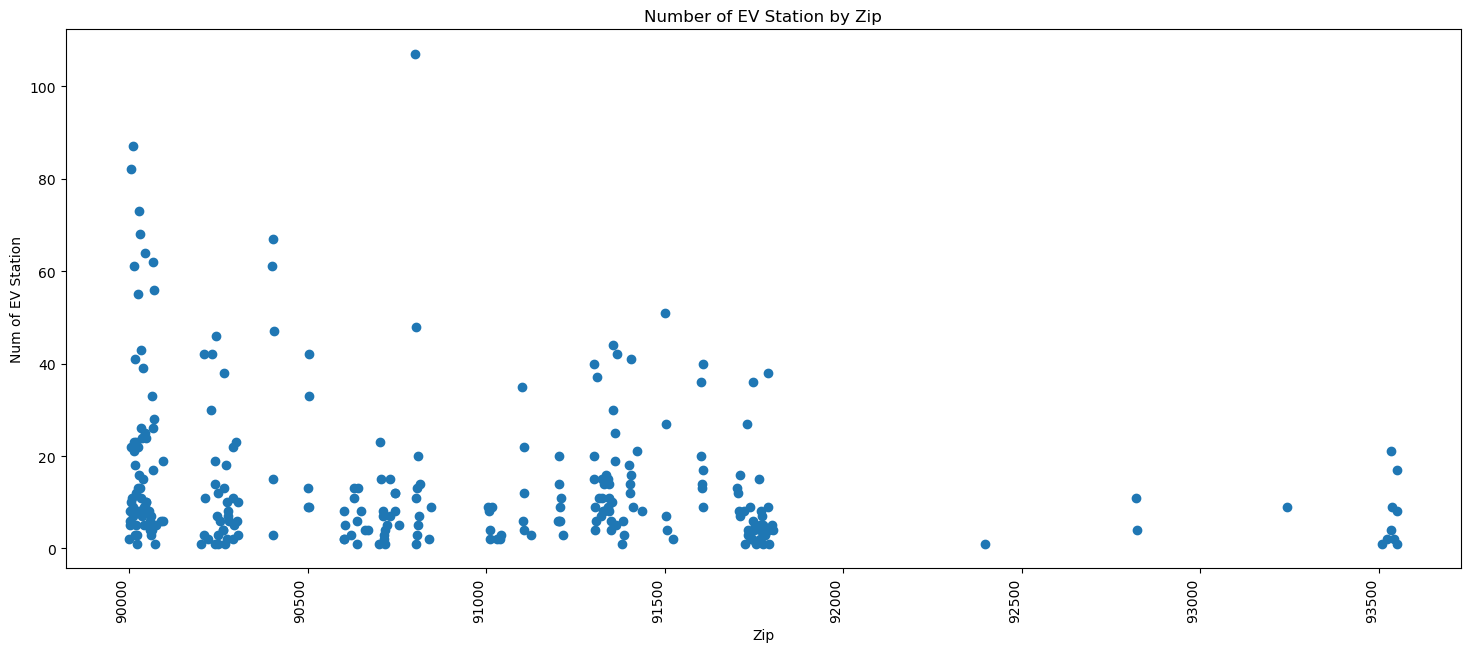

In [7]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(18, 7))
x = ev_zip_count_df["zip"]
y = ev_zip_count_df["count"]

plt.scatter(x,y)
plt.xlabel('Zip')
plt.ylabel('Num of EV Station')
plt.xticks(rotation=90, ha='right')
plt.title('Number of EV Station by Zip')
plt.show()

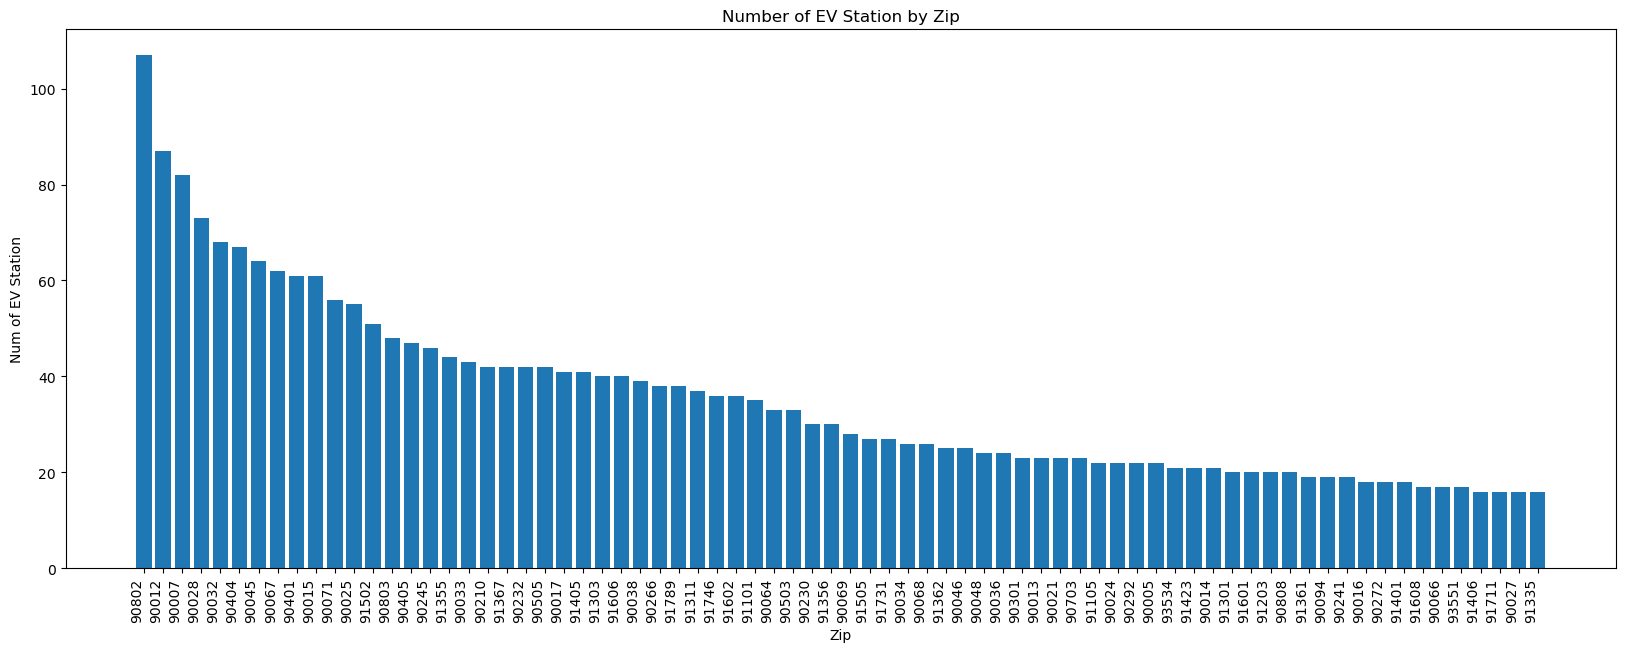

In [19]:
# Bar Plot

fig, ax = plt.subplots(figsize=(20, 7))
ev_zip_count_dfs = ev_zip_count_df[ev_zip_count_df["count"] > 15] # Filter the zip code with more than 15 stations
x = ev_zip_count_dfs["zip"].astype('string')
y = ev_zip_count_dfs["count"]

plt.bar(x,y)
plt.xlabel('Zip')
plt.ylabel('Num of EV Station')
plt.xticks(rotation=90, ha='right')
plt.title('Number of EV Station by Zip')
plt.show()

### Look at Connector Type

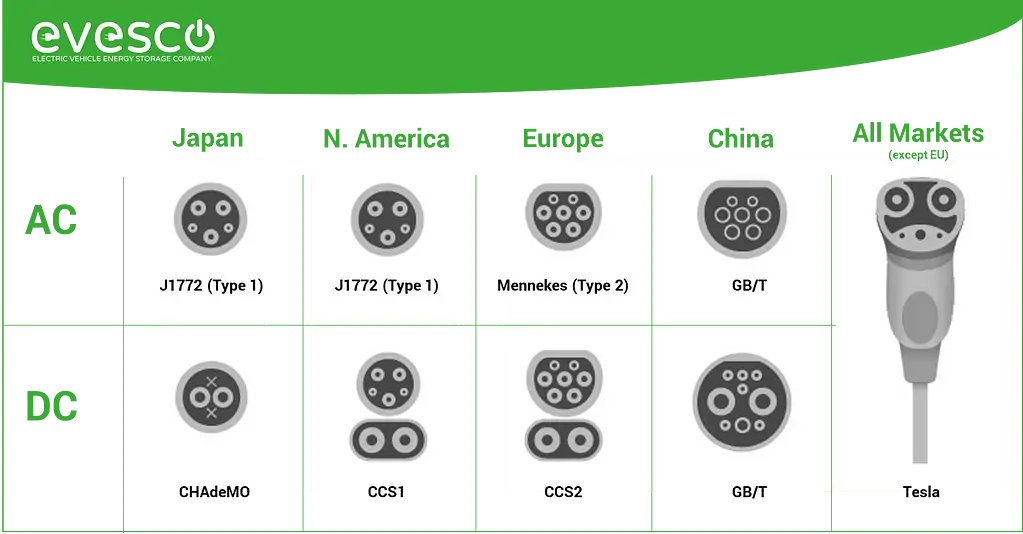

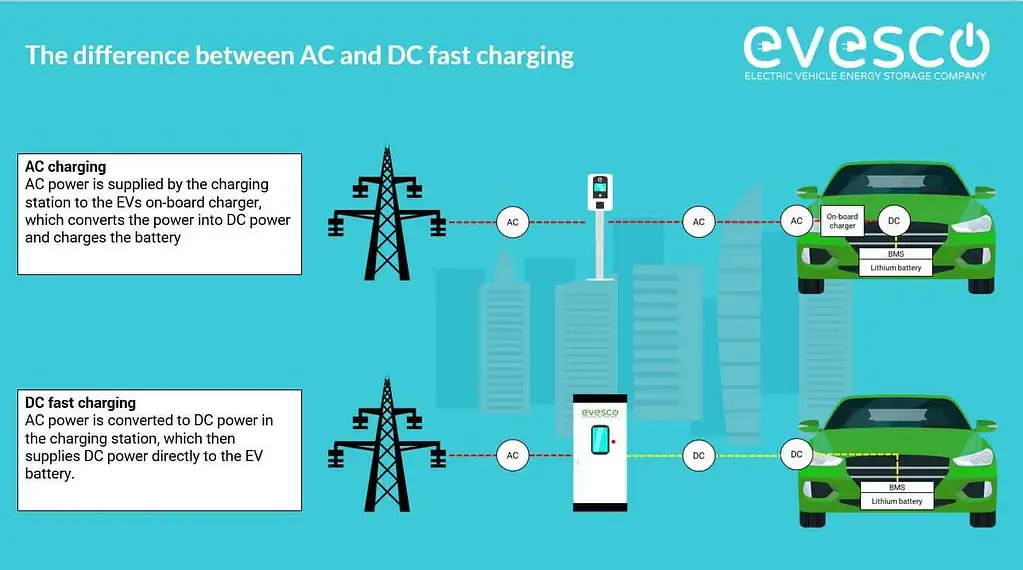

source: [document](https://www.power-sonic.com/blog/ev-charging-connector-types/#:~:text=The%20main%20difference%20between%20CCS,charging%20ports%20on%20the%20vehicle.)

AC Charging (Alternative - normal) vs DC charging (Direct - fast)
- J1772 == AC
- CHADEMO == DC
- J1772 COMBO == DC 
- TESLA == AC/DC 

In [26]:
# Number of EV charging station by zip
ev_connector_count = evc_df['ev_connector_types'].value_counts()
ev_connector_count_df = pd.DataFrame({'connector_type': ev_connector_count.index, 'count': ev_connector_count.values})

ev_connector_count_df.head()

,connector_type,count
0,['J1772'],3483
1,"['CHADEMO', 'J1772COMBO']",203
2,['TESLA'],118
3,"['CHADEMO', 'J1772', 'J1772COMBO']",56
4,"['J1772', 'TESLA']",42


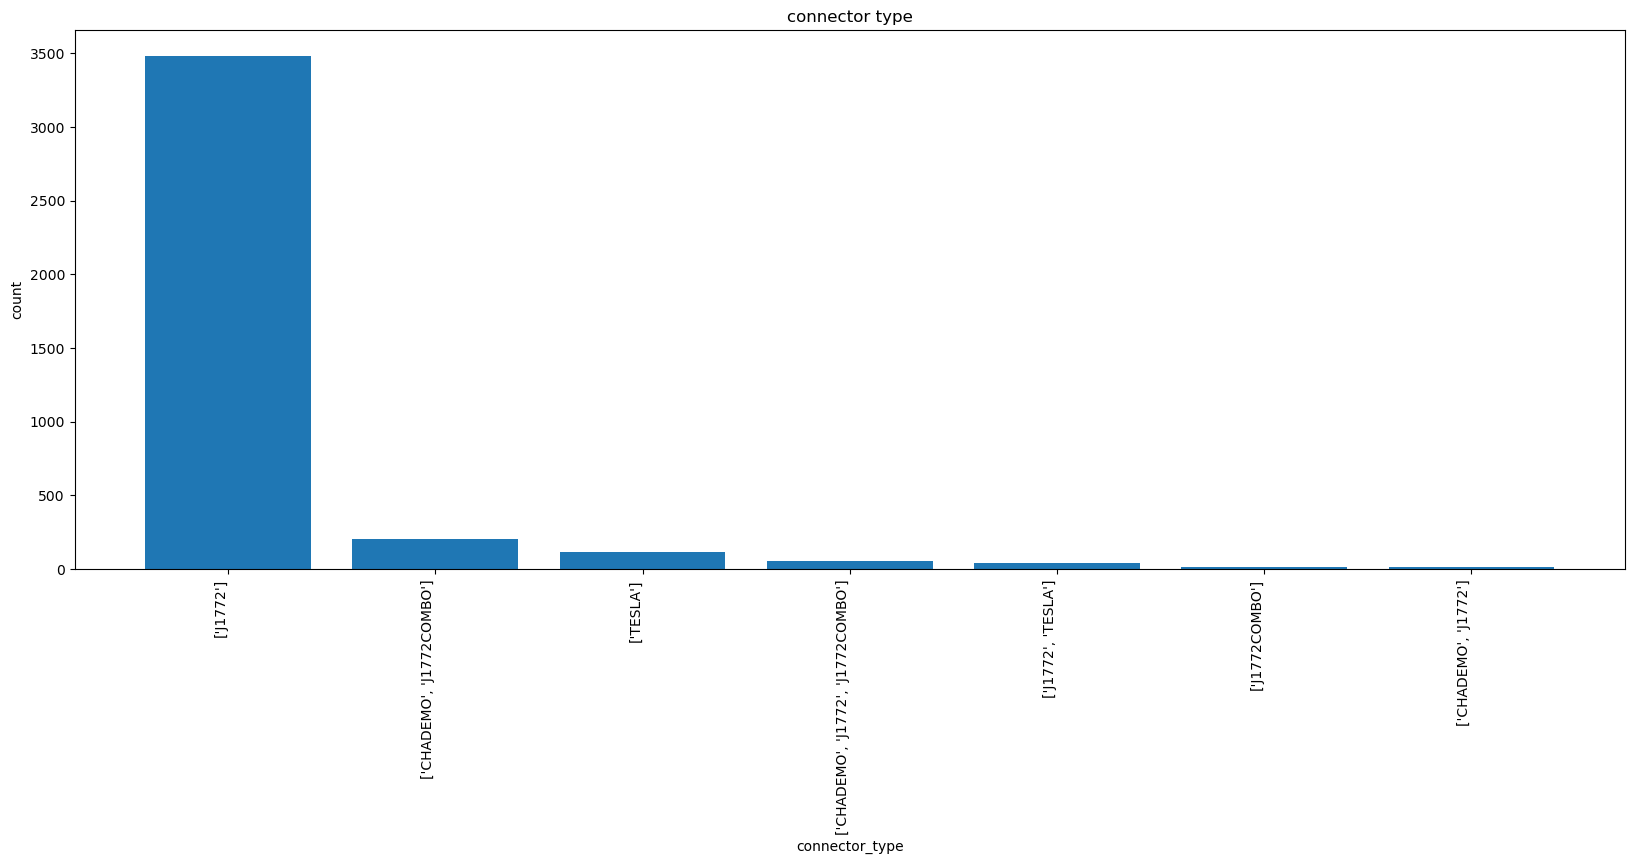

In [86]:
# Bar Plot

fig, ax = plt.subplots(figsize=(20, 7))
ev_connector_count_dfs = ev_connector_count_df[ev_connector_count_df["count"] > 10] # Filter more than 10 
x = ev_connector_count_dfs["connector_type"].astype('string')
y = ev_connector_count_dfs["count"]

plt.bar(x,y)
plt.xlabel('connector_type')
plt.ylabel('count')
plt.xticks(rotation=90, ha='right')
plt.title('connector type')
plt.show()

### Look at the open date

In [45]:
# Let's look by year 
evc_df["open_year"] = pd.to_datetime(evc_df['open_date']).dt.year.fillna(0).astype('int').astype('string')
evc_df["open_year"].head()

0    2019
1    2021
2    2021
3    2022
4    2021
Name: open_year, dtype: string

In [46]:
ev_year_count = evc_df['open_year'].value_counts()
ev_year_count_df = pd.DataFrame({'year': ev_year_count.index, 'count': ev_year_count.values})

ev_year_count_df.head()

,year,count
0,2021,1261
1,2020,903
2,2022,791
3,2023,215
4,2018,203


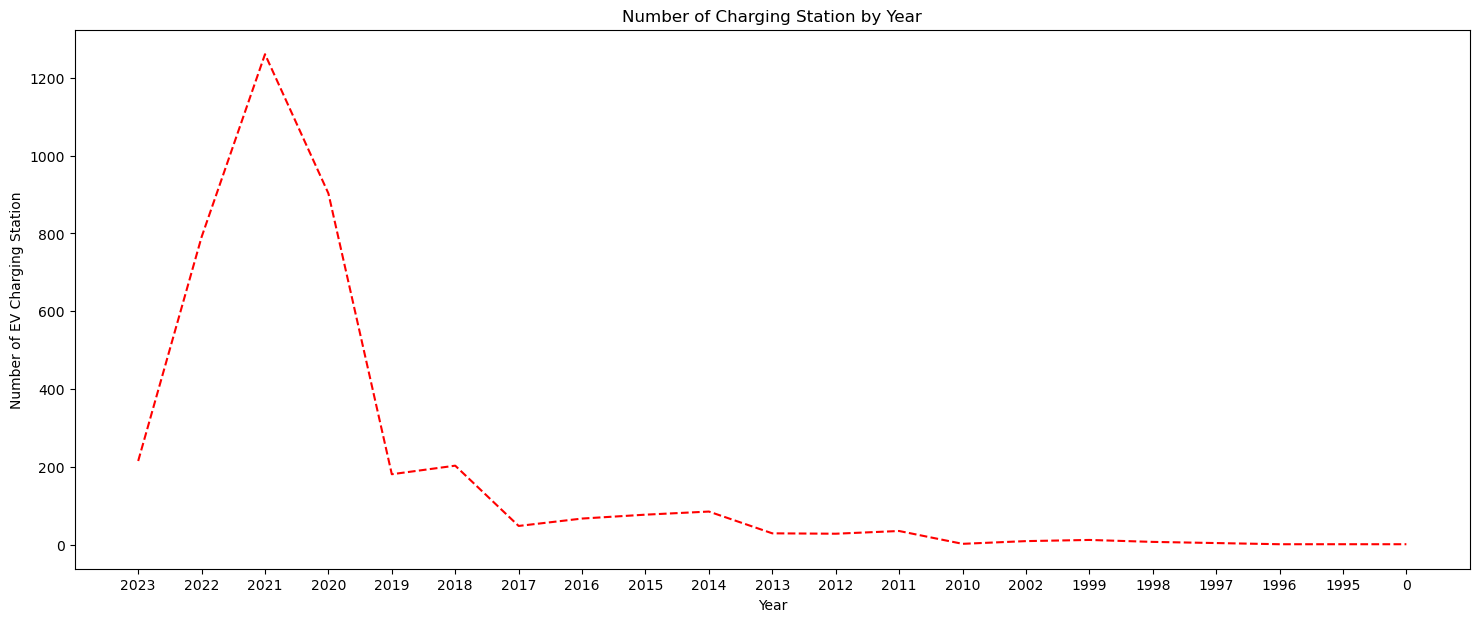

In [58]:
# Sort by year in descending order
ev_year_count_df = ev_year_count_df.sort_values(by='year', ascending=False)

# Create a line plot

fig, ax = plt.subplots(figsize=(18, 7))
x = ev_year_count_df["year"]
y = ev_year_count_df["count"]

plt.plot(x, y,
        linestyle='--',
         color='r',)

# Add labels and title

plt.xlabel('Year')
plt.ylabel('Number of EV Charging Station')
plt.title('Number of Charging Station by Year')

# Display the plot

plt.show()

### Spatial Analysis: EV Charging Stations

In [132]:
# get geometry
evc_gdf = gpd.GeoDataFrame(evc_df, geometry = gpd.points_from_xy(evc_df.longitude, evc_df.latitude, 
                                                                crs = 'EPSG: 4326'))
# There are two latitude that seem to be off - let's drop it  
evc_gdf = evc_gdf[(evc_gdf["latitude"]>0) & (evc_gdf["latitude"] < 36)]

evc_gdf.head()

,id,station_name,open_date,status_code,fuel_type_code,ev_connector_types,ev_network,groups_with_access_code,access_days_time,street_address,city,zip,state,longitude,latitude,geometry
0,117709,Bexco Enterprises,2/7/2019,E,ELEC,['J1772'],Blink Network,Public,NaN,8700 Rex Rd,Pico Rivera,90660,CA,-118.105339,33.979264,POINT (-118.10534 33.97926)
1,185373,"Walmart 2886 (Pico Rivera, CA)",2/25/2021,E,ELEC,"['CHADEMO', 'J1772COMBO']",Electrify America,Public,24 hours daily,8500 WASHINGTON BLVD,Pico Rivera,90660,CA,-118.104950,33.986450,POINT (-118.10495 33.98645)
2,197430,Pico Rivera Towne Center,10/7/2021,E,ELEC,['J1772'],Volta,Public,Mon 5:00am - 10:59pm; Tue 5:00am - 10:59pm; We...,8982 Washington Blvd,Pico Rivera,90660,CA,-118.099941,33.984130,POINT (-118.09994 33.98413)
3,212402,Village Walk Pico Rivera,3/25/2022,E,ELEC,['J1772'],Volta,Public,Mon 5:00am - 10:59pm; Tue 5:00am - 10:59pm; We...,8540 Whittier Boulevard,Pico Rivera,90660,CA,-118.090328,34.002432,POINT (-118.09033 34.00243)
4,176659,SCPPA SOUTHWEST,1/27/2021,E,ELEC,['J1772'],ChargePoint Network,Public,24 hours daily,1160 Nicole Ct,Glendora,91740,CA,-117.822526,34.117961,POINT (-117.82253 34.11796)


[]

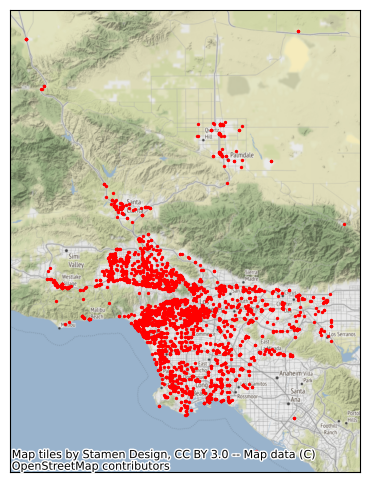

In [139]:
import contextily as ctx
import matplotlib.pyplot as plt

# Create blank figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Plot the data. ax=ax means we plot it on the axes that we just created
evc_gdf.to_crs('EPSG:3857').plot(color="red", ax=ax, markersize = 2) # the most common = 3857 / 4326

# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=10)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])